### Several Important Things Before Running the Code:
* A cleaned csv named "**hu_1002224728_df_c.csv**" is attached in the submission. Since my lemmatizer **takes 2 hrs to complete cleaning**, I saved a csv after cleaning. If you want to use my cleaned csv, you can **skip the data cleaning section**, and start run the cleaned csv in the exploratory analysis.
* A grid search on LDA model named "**hu_1002224728_lda_gs_model.pkl**" is also attached. Since the grid search **takes 2.5 hrs to complete**, I also saved the model, so you can directly **import it use my line of code (joblib package) in the import data section**.
* A html LDA model visualizer named "**hu_1002224728_lda_vis.html**" is attached. So you run the html code in the LDA section to directly see the visualization. The pyLDAvis sometimes is installed with an older version which will cause incompatibility with pandas.

Thank you so much!

## Import Packages

In [ ]:
# !pip install plotly
# !pip install joblib
# !pip install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
import math
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.lancaster import LancasterStemmer
import scipy.sparse
from collections import Counter
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from bs4 import BeautifulSoup
import html

import csv
import random

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.cm as cm

from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from matplotlib.pyplot import figure
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete

import joblib
from yellowbrick.cluster import InterclusterDistance

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # original raw datafile
# data_path = "/content/drive/My Drive/MASc First Year/MIE1624/final/metadata.csv"

# # cleaned df ready for exploratory analysis
# df_path = "/content/drive/My Drive/MASc First Year/MIE1624/final/hu_1002224728_df_c.csv"

# # grid search model from LDA, since this model takes about 2.5hrs to fit
# model_path = "/content/drive/My Drive/MASc First Year/MIE1624/final/hu_1002224728_lda_gs_model.pkl"

# # lda visualization html
# ldavs_path = "/content/drive/My Drive/MASc First Year/MIE1624/final/hu_1002224728_lda_vis.html"

Mounted at /content/drive


In [ ]:
# # google mount path
# # original raw datafile
# raw_df = pd.read_csv(data_path)

# # cleaned df ready for exploratory analysis
# df_c = pd.read_csv(df_path)
# df_c = df_c.iloc[:, 1:]

# # grid search model from LDA, since this model takes about 2.5hrs to fit
# lda_gs = joblib.load(model_path)

In [ ]:
# direct import
# original raw datafile
raw_df = pd.read_csv('metadata.csv')

# cleaned df ready for exploratory analysis
df_c = pd.read_csv('hu_1002224728_df_c.csv')
df_c = df_c.iloc[:, 1:]

# grid search model from LDA, since this model takes about 2.5hrs to fit
lda_gs = joblib.load('hu_1002224728_lda_gs_model.pkl')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LatentDirichletAllocation from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
print(raw_df.shape)
raw_df.head()

(497906, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## Data Cleaning

In [ ]:
# Filter data with only certain number of keywords
def contain_only(df, word):
    """
    Filter the dataframe to select rows only contain customized keywords
    """
    new_df = df[df['abstract'].str.contains(word)]
    return new_df

stops = set(stopwords.words("english"))
def remove_stopwords(text):
    """
    Remove words from the stopwords 
    """
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [token for token in tokens if token not in stops]
    return ' '.join(tokens)

def remove_urls(text):
    """
    Using re.sub to remove urls 
    """
    cleantext = re.sub('(http|https|ftp)://[a-zA-Z0-9\\./]+', '', text) 
    return cleantext

nlp = spacy.load('en_core_web_sm')
def lemmatizer(text):
    """
    Lemmatize a word into dictionary format
    """
    doc = nlp(text) 
    tokens = [token for token in doc] 
    lemmatized_sentence = ' '.join([token.lemma_ for token in doc]) 
    return lemmatized_sentence

def isEnglish(s):
    """
    Check whether the current text is English or not
    """
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [ ]:
def text_cleaning(col):
    """
    Clean the text
    """
    # create a new column called clean_text and convert text into string
    col = col.astype(str)
    
    # Unicode into ASCII equivalent
    col = col.fillna("").apply(html.unescape)
    
    # convert into lower case - no change in mse
    col = col.str.lower()

    # remove numbers, punctuations and special characters
    col = col.str.replace('[^a-zA-Z]',' ')

    # remove urls
    col = col.apply(remove_urls)

    # remove stopwords
    col = col.apply(remove_stopwords)
    
    # lemmatize words
    col = col.apply(lemmatizer)
   
    return col

def process_data(df):
    """
    Clean title and abstract columns separately
    """
    # select useful columns
    df = df[['title','abstract','authors','publish_time']]
    
    # drop duplicates
    df = df.drop_duplicates(subset='abstract', keep="first")
    
    # drop NA
    df = df.dropna()
    
    # Keep English Text
    df = df[[isEnglish(t) for t in df['title']]].reset_index(drop=True)
    
    # select data only related to covid
    df = contain_only(df, "covid|COVID|cov|nCoV|CoV|SARS-CoV-2|covid-19|COVID-19")
    
    # Apply text_cleaning to only abstract columns
    df['abstract'] = text_cleaning(df['abstract'])
    
    return df

In [ ]:
# takes about 2 hrs to complete cleaning
df_c = process_data(raw_df)
print(df_c.shape)
df_c.head()

(169601, 4)


,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describe ...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
25,Recombination Every Day: Abundant Recombinatio...,viral recombination dramatically impact evolut...,"Froissart, Remy; Roze, Denis; Uzest, Marilyne;...",2005-03-01
33,Draft versus finished sequence data for DNA an...,sequence pathogen genome costly demand careful...,"Gardner, Shea N.; Lam, Marisa W.; Smith, Jason...",2005-10-20
36,Relevance of human metapneumovirus in exacerba...,background methods human metapneumovirus hmpv ...,"Rohde, G; Borg, I; Arinir, U; Kronsbein, J; Ra...",2005-12-21
41,Development of a humanized monoclonal antibody...,neutralization west nile virus wnv vivo correl...,"Oliphant, Theodore; Engle, Michael; Nybakken, ...",2005-04-24


In [ ]:
# export csv
# from google.colab import files
# df_c.to_csv('df_c.csv') 
# files.download('df_c.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Analysis

#### Word Cloud on filtered data only reated to Covid

<Figure size 1080x1080 with 0 Axes>

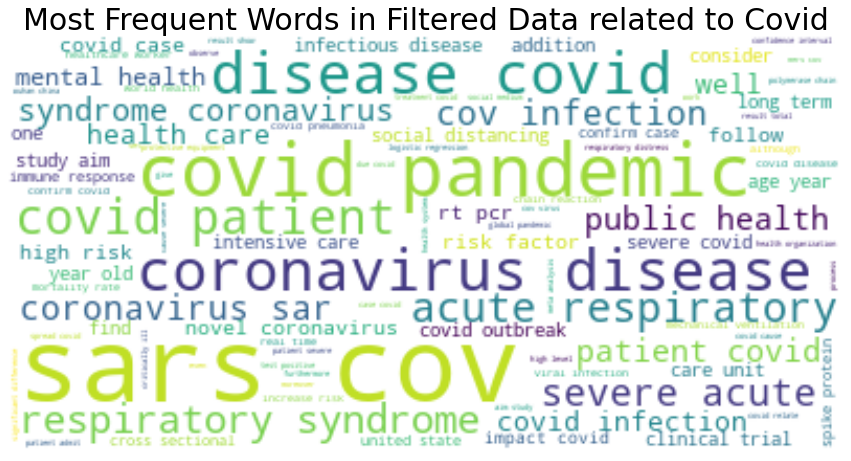

In [ ]:
text = " ".join(word for word in df_c.abstract)

plt.figure(figsize= (15,15))

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most Frequent Words in Filtered Data related to Covid', fontsize = 30)
plt.axis("off")
plt.show()
# re-run this

This wordcloud examines the most frequent words from all abstracts related to covid. All the largest fonts are related to covid. The word "risk factor" indicates that many abstracts mentioned about risk factor. We can also see potential risk factors appeared frequently, which are "mental health", "age year", "year old".

#### N-gram with filtered data only related to Covid

In [ ]:
# Reference: # https://www.kaggle.com/benroshan/sentiment-analysis-amazon-reviews#Extracting-Features-from-Cleaned-reviews
# custom function for ngram generation
stops = set(stopwords.words("english"))
def generate_ngrams(text, n_gram=1):
    """
    generate n-grams with default as unigram from given text
    """
    token = [token for token in text.lower().split(" ") if token != "" if token not in stops]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]
  
def horizontal_bar_chart(df, color):
    """
    generate horizontal bar chart on word counts for each word from n-grams
    with customized color
    """
    trace = go.Bar(y = df["word"].values[::-1], x = df["wordcount"].values[::-1],
                 showlegend=False, orientation = 'h', marker=dict( color=color,))
    return trace

In [ ]:
# make a dictionary to store word counts for each word
freq_dict = defaultdict(int)
# loop over all abstracts to get the sentences, generate unigram based on sentence
for sent in df_c["abstract"]:
    for word in generate_ngrams(sent,1):
        freq_dict[word] += 1
# sort the word items based on word count
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
# select top 25 words with highest frequency and make a horizontal bar chart
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# bigram generation
freq_dict = defaultdict(int)
for sent in df_c["abstract"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

# trigram generation
freq_dict = defaultdict(int)
for sent in df_c["abstract"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'green')

In [ ]:
# Creating three subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Unigram Frequent Words in Abstracts Related to Covid",
                                          "Bigram Frequent Words in Abstracts Related to Covid",
                                          "Trigram Frequent Words in Abstracts Related to Covid"
                                          ])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig['layout'].update(height=1500, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')
# re-run

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1796: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




The n-gram plots explore the top 25 words in unigram, bigram and trigram from all abstracts related to Covid. All the top words are mostly about covid. Trigram and bigram seems to convey more meaningful message than unigram. We can see the word "mental health", "risk factor", and "high risk" similar to what wordcloud shows. 

#### Explore frequency of keywords related to Risk Factor in filtered data

In [ ]:
# Reference: https://www.kaggle.com/ajrwhite/covid-19-thematic-tagging-with-regular-expressions/notebook
def abstract_filter(search_string):
    """
    Filter abstracts based on given substring, also conver t everything into 
    lower case string.
    """
    return (df_c.abstract.str.lower().str.replace('-', ' ').str.contains(search_string, na=False)) 

# Helper function for Cleveland dot plot visualisation of count data
def dotplot(input_series, title, x_label='Count', y_label='Regex'):
    """
    Generate Cleveland dot plot to visualize the top keywords with their frequency.
    """
    subtitle = '<br><i>Hover over dots for exact values</i>'
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x=input_series.sort_values(),
    y=input_series.sort_values().index.values,
    marker=dict(color="crimson", size=12),
    mode="markers",
    name="Count",
    ))
    fig.update_layout(title=f'{title}{subtitle}',
                  xaxis_title=x_label,
                  yaxis_title=y_label)
    fig.show()

def count_and_tag(df: pd.DataFrame, synonym_list: list,
                  tag_suffix: str) -> (pd.DataFrame, pd.Series):
    """
    Count the frequency of the words from the given synonym_list.
    Return the original dataframe with a series of word counts
    """
    counts = {}
    df[f'tag_{tag_suffix}'] = False
    for s in synonym_list:
        synonym_filter = abstract_filter(s)
        counts[s] = sum(synonym_filter)
        df.loc[synonym_filter, f'tag_{tag_suffix}'] = True
    return df, pd.Series(counts)

In [ ]:
risk_factor_synonyms = ['risk', 'factor',
                        'risk factor',
                        'risk model',
                        'comorbidity',
                        'factor predict',
                        'factor associate',
                        'underlying disease',
                        'underlying condition']
df_c, risk_generic_counts = count_and_tag(df_c, risk_factor_synonyms, 'risk_generic')
dotplot(risk_generic_counts,
        'Count of generic risk factor indicated in abstract')

We would like to examine how frequent the words related to risk factor appeared in the filtered abstracts. Out of 170,000 covid related abstracts, almost 40,000 abstracts have the word "risk", 26,000 abstracts have "factor", 7,777 abstracts have the exact "risk factor". Near half of the abstracts mentioned about risks.

In the next few steps, our plan is to:
* Use K-means Clustering and LDA Topic Modeling to explore all the keywords as potential risk factors
* Use Hierarchical clustering to visualize the relationship between those risk factors based on all Covid-related abstracts
* Use TF-IDF and cosine similarity to examine which risk factors are more deadly (closely mentioned with terms related to death)

These models will help us fully understand what those 170,000 covid related abstracts talk about, and what are the common risk factors discussed by researchers.

## Model Preparation: TF-IDF & PCA

In [ ]:
# Apply TF-IDF on the filtered data, and select only 5000 words 
# considering unigram, bigram and trigram
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(df_c['abstract'])
print(tfidf_matrix.shape)

(169601, 5000)


We apply TF-IDF to the abstract of the filtered data and only obtain the top 5000 words considering unigram, bigram and trigram.

In [ ]:
# Apply Randomized PCA to handle sparse input with only 2500 components
svd = TruncatedSVD(n_components=2500, random_state=7)
tp_matrix = svd.fit_transform(tfidf_matrix)
print(tp_matrix.shape)

(169601, 2500)


Since there are 5000 words, the matrix is quite sparse, the truncated SVD is used as a randomized PCA rather than traditional PCA to reduce dimensionality to capture the largest variances.

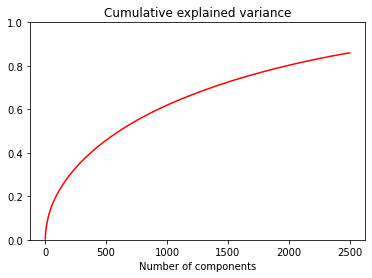

In [ ]:
# Make a PCA plot to determine optimal number of principal components
# The optimal number should capture at least 85% of the total variance.
plt.plot(range(1, svd.n_components+1), np.cumsum(svd.explained_variance_ratio_),'r-')
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylim(0,1)
plt.show()

Here, we double-check whether 2500 principal components are good enough to capture the largest variance. With around 85% cumulative explained variance, 2500 is a good choice.

## K-means Clustering to Explore Potential Risk Factors

In [ ]:
# Reference: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
def find_optimal_clusters(data, max_k):
    """
    Apply the elbow method to find the optimal number of clusters. 
    It computes the sum of squared error (SSE) for all number of clusters entered.
    SSE is defined as the sum of the squared distance between centroid 
    and each member of the cluster. 
    """
    
    iters = range(2, max_k+1, 2)
    # store sse for each number of clusters
    sse = []

     # applt k-means on each number of clusters 
     # MiniBatchKMeans is faster with large of number data
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, 
                               random_state = 20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title(' Elbow Method (SSE) by Cluster Center Plot')

def plot_tsne_pca(data, labels):
    """
    One plot uses PCA to better capture global structure of the data. 
    Another plot uses TSNE to better capture relations between neighbors. 
    3,000 abstracts with 50 principle compoenents are selected to speed up the 
    TSNE process. on the data first. Then data is also scaled down into 300 points
    in the scatterplot to clearly show the groups
    """
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
  
    # generate PCA and TSNE
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
  
    # sampling 1000 points for scatterplot
    idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
  
def get_top_keywords(data, clusters, labels, n_terms):
    """
    Get the top n number of words from each cluster
    """
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

# Reference: https://millerdw.github.io/Stop-Words-And-Cluster-Visualisation/
def CreateWordCloud(text):
    """
    Create a wordcloud obejct from given taxt, with white background 
    and 50 as the maximum number of words
    """
    return WordCloud(background_color="white", max_words=50).generate(text)

def plot_row(total_num):
    """
    Calculate number of rows in the wordcloud subplots based on total number 
    of clusters
    """
    if total_num %4 == 0:
        r = total_num//4
    # if it has remainder, additional row is needed
    else: 
        r = total_num//4 + 1
    return r

def PlotClusterWordCloudArray(data, clusters, labels, n_terms):
    """
    Make a wordcloud for each cluster, showing the most frequent words from 
    each cluster
    """
    # make a dataframe with the data, then groupded based on given clusters
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # set number of rows for the subplots
    row = plot_row(len(set(clusters)))
    fig, axes = plt.subplots(row, 4, figsize=(15,15), squeeze=True)
    fig.tight_layout()
    
    # generate each wordcloud for each cluster and position it with 4 columns
    for i,r in df.iterrows():
        text_c = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        r = i//4
        j = i%4
        axes[r, j].imshow(CreateWordCloud(text_c), interpolation='bilinear')
        axes[r, j].axis("off")
        axes[r, j].set_title('Cluster {}'.format(i))

#### Directly on TF-IDF

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


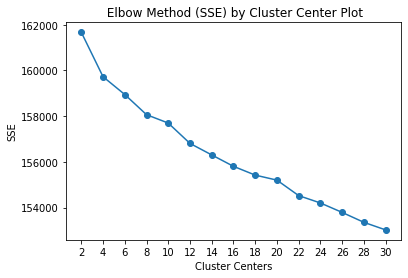

In [ ]:
# tfidf with 5000 components
find_optimal_clusters(tfidf_matrix, 30)

The idea of this algorithm is to find the optimal number of clusters at which the line decreases abruptly.

We cannot see a clear elbow from the plot. Due to a very large set of words, k-means clustering experienced difficulty to group words made by the tf-idf frequency into smaller number of groups. The line keeps going down, but choosing larger number of clusters seem to be more trivial revealing the groups. 

We can see a larger drop from 20 clusters to 22 clusters, followed by several smaller drops. So we decided that 22 clusters seem to be optimal here.



In [ ]:
clusters_t = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=7).fit_predict(tfidf_matrix)

In [ ]:
silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

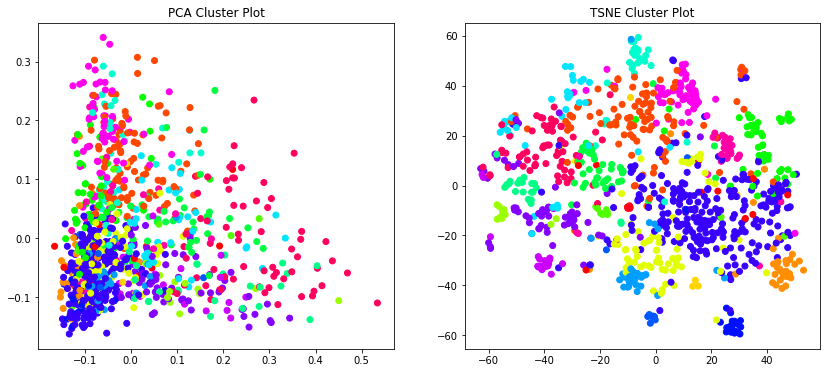

In [ ]:
plot_tsne_pca(tfidf_matrix, clusters_t)

According to the TSNE plot, we can see the blue, dark orange, light yellow/greenish and dark pink are clusters well apart from each other.

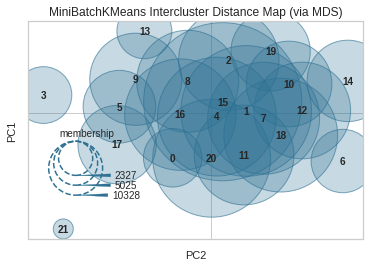

In [ ]:
vis1 = InterclusterDistance(MiniBatchKMeans(n_clusters=22, init_size=1024, 
                                          batch_size=2048, random_state=7),
                                  legend_loc='lower left')
vis1.fit(tfidf_matrix)
vis1.finalize()

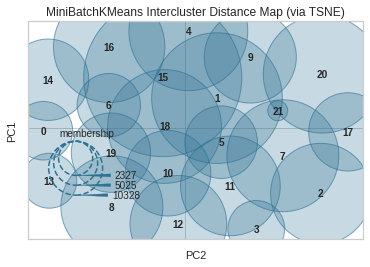

In [ ]:
vis2 = InterclusterDistance(MiniBatchKMeans(n_clusters=22, init_size=1024, 
                                          batch_size=2048, random_state=7), 
                                  embedding='tsne',
                                  legend_loc='lower left')
vis2.fit(tfidf_matrix)
vis2.finalize()

The MDS and TSNE plots made by yellowbricks also show that the k-means clustering does not perform well. There are significant overlaps between clusters.

In [ ]:
get_top_keywords(tfidf_matrix, clusters_t, tfidf_vectorizer.get_feature_names(), 10)


Cluster 0
pandemic,facility,staff,covid,nurse,nursing home,care,home,nursing,resident

Cluster 1
respiratory,infection,treatment,clinical,symptom,severe,case,disease,covid,patient

Cluster 2
symptom,pandemic,covid,stress,depression,psychological,health,mental health,anxiety,mental

Cluster 3
mask wear,wear mask,surgical,surgical mask,use,respirator,wear,face,face mask,mask

Cluster 4
measure,spread,transmission,rate,death,epidemic,number,country,covid,case

Cluster 5
sequence,virus,protein,genome,sars cov,viral,sars,cov,nsp,rna

Cluster 6
cov,sars,delivery,birth,covid,maternal,pregnancy,pregnant woman,pregnant,woman

Cluster 7
visit,hospital,procedure,pandemic,surgical,covid,care,cancer,surgery,patient

Cluster 8
igg,positive,assay,rt,sample,pcr,sars cov,sars,cov,test

Cluster 9
target,bind,antiviral,inhibitor,protease,sars cov,cov,sars,compound,drug

Cluster 10
covid pneumonia,scan,image,chest ct,pneumonia,lung,covid,chest,patient,ct

Cluster 11
response,expression,cov,sars,cd,cytoki

The top ten words from each cluster reveal that k-means clustering did a decent job in grouping the words. We can see cluster 1 has all about clinical terms; cluster 2 has all **mental health** related terms; cluster 6 related to **pregnancy and neonatal**; cluster 10 is about **lung disease and pneumonia**; cluster 13 mentions about **air pollution**; cluster 14 is about **online learning and teaching**.

Kmeans Clustering is usually used as data exploration. We use Kmeans to examine potential risk factors from those papers. We can see that mental health might be an important risk factor for Covid. We also plot each cluster using wordcloud. We see that mental health, lung disease, air pollution and pregnancy can be the risk factors of Covid.

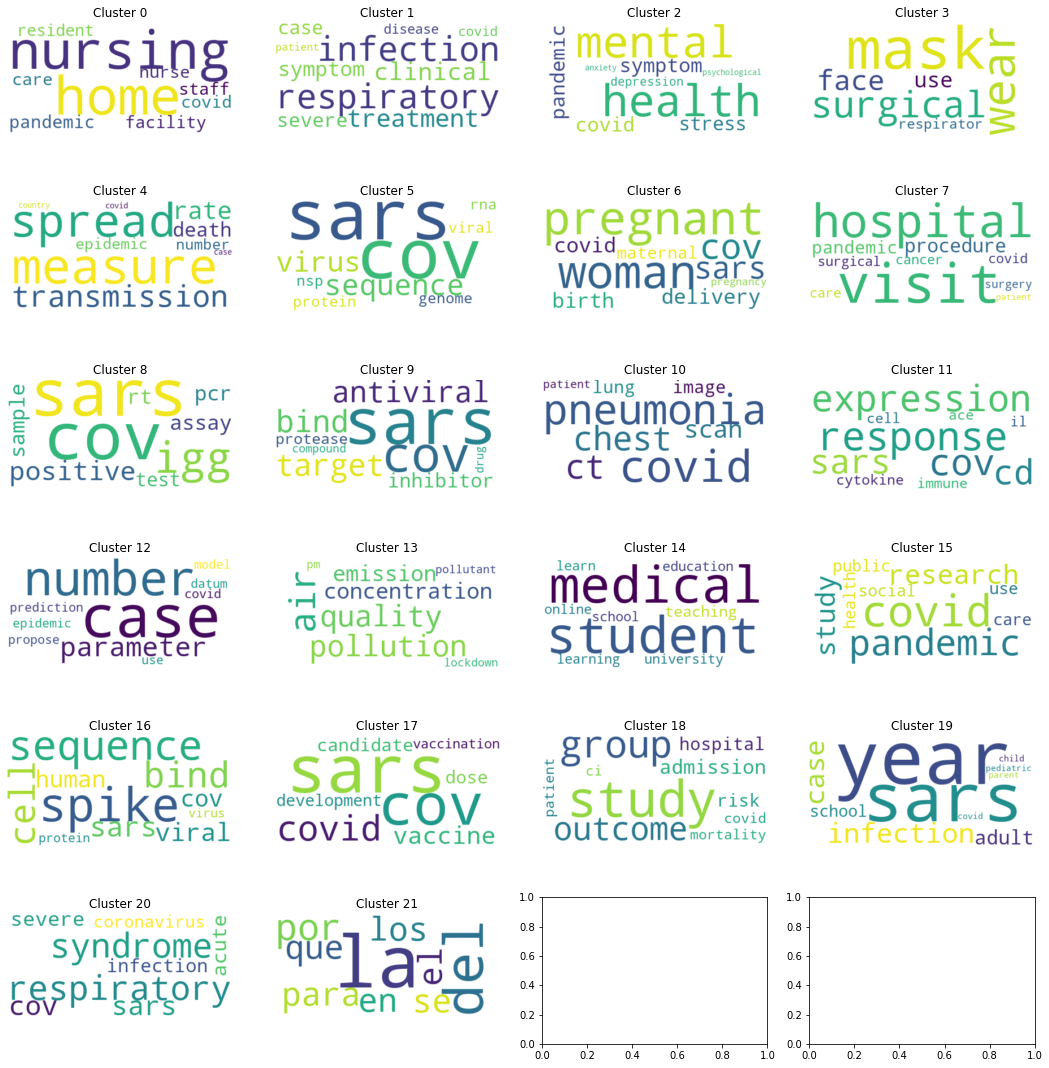

In [ ]:
PlotClusterWordCloudArray(tfidf_matrix, clusters_t, tfidf_vectorizer.get_feature_names(), 10)

#### PCA

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


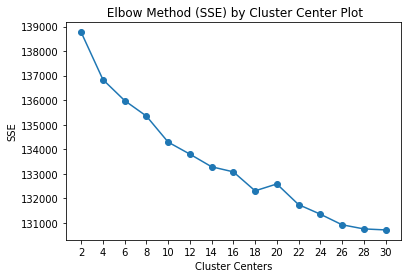

In [ ]:
# 2500 SVD components from 5000 words from TF-IDF
find_optimal_clusters(tp_matrix, 30)

Kmeans clustering on PCA also shows an abrupt decrease from 20 to 22 clusters.

In [ ]:
clusters_p = MiniBatchKMeans(n_clusters=22, init_size=1024, batch_size=2048, random_state=7).fit_predict(tp_matrix)

Since after PCA, we cannot know which words are selected from PCA, so we still need to apply the orginal TF-IDF matrix before PCA. Then we applied the clusters grouped based on PCA to the TF-IDF matrix to find the top 10 words from PCA clusters.

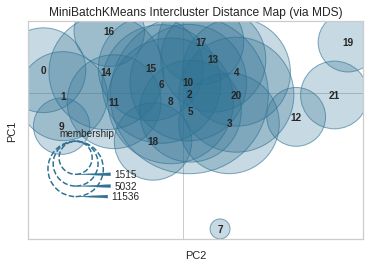

In [ ]:
vis1 = InterclusterDistance(MiniBatchKMeans(n_clusters=22, init_size=1024, 
                                          batch_size=2048, random_state=7),
                                  legend_loc='lower left')
vis1.fit(tp_matrix)
vis1.finalize()

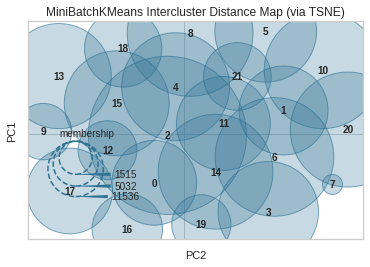

In [ ]:
vis2 = InterclusterDistance(MiniBatchKMeans(n_clusters=22, init_size=1024, 
                                          batch_size=2048, random_state=7), 
                                  embedding='tsne',
                                  legend_loc='lower left')
vis2.fit(tp_matrix)
vis2.finalize()

Both plots do not differ from kmeans clustering directly on TF-IDF. The k-means significantly suffer from overlaps.

In [ ]:
get_top_keywords(tfidf_matrix, clusters_p, tfidf_vectorizer.get_feature_names(), 10)


Cluster 0
medical student,teaching,medical,university,school,learning,learn,education,online,student

Cluster 1
nsp,inhibitor,sars cov,sars,cov,compound,protease,drug,bind,protein

Cluster 2
impact,research,study,public,covid pandemic,social,use,health,pandemic,covid

Cluster 3
symptom,pandemic,covid,stress,psychological,depression,health,mental health,anxiety,mental

Cluster 4
acute respiratory,severe,acute,respiratory syndrome,syndrome,coronavirus,sars cov,respiratory,sars,cov

Cluster 5
disease,analysis,death,study,age,risk,covid,patient,mortality,ci

Cluster 6
vs,clinical,severe,icu,hospital,day,covid patient,group,covid,patient

Cluster 7
video,survey,telemedicine,virtual,patient,person,satisfaction,provider,telehealth,visit

Cluster 8
health care,service,hospital,covid pandemic,healthcare,health,pandemic,covid,patient,care

Cluster 9
trial,covid,treatment,traditional,traditional chinese medicine,traditional chinese,chinese medicine,medicine,tcm,chinese

Cluster 10
present,clinic

There are several **similar** clusters from directly clustering on TF-IDF. They are cluster 0 about **online teaching and learning**; cluster 3 about **mental health**; cluster 16 about **pregnancy**; cluster 17 about **pneumonia**; and cluster 21 about **air pollution**.

However, PCA clustering also reveals slightly **different** clusters. Cluster 9 is about **Chinese Medicine**; cluster 12 is about **climate, temperature and humidity**; cluster 18 is about **cancer**; and cluster 19 is about "**stroke**".

Since PCA finds the largest variance between all the words, the keywords between clusters are more distinct compared to direct clustering on TF-IDF.

The additional risk factors can be climate, temperature, humidity, cancer and stroke. The wordcloud below basically conveys the similar message.

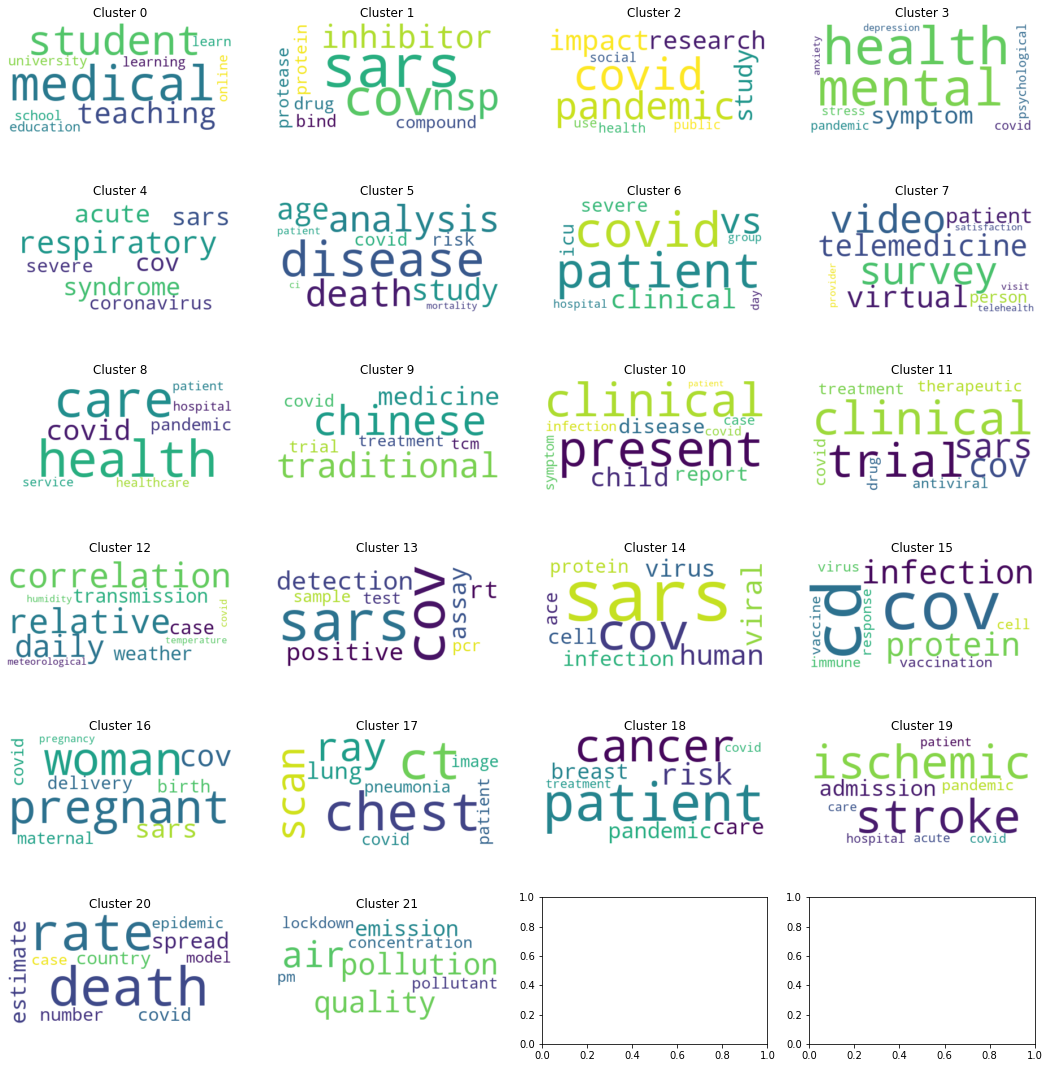

In [ ]:
PlotClusterWordCloudArray(tfidf_matrix, clusters_p, tfidf_vectorizer.get_feature_names(), 10)

## LDA Topic Modeling to Explore Potential Risk Factors

Because Kmeans Clustering shows 22 clusters might be optimal number according to the elbow method. We firstly set the LDA to have 22 topics.

In [ ]:
# Around 10 mins to finish fitting
LDA = LatentDirichletAllocation(n_components=22, random_state=7)
LDA.fit(tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=22, n_jobs=None,
                          perp_tol=0.1, random_state=7, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", LDA.score(tfidf_matrix))

# Perplexity: Lower the better. 
# Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", LDA.perplexity(tfidf_matrix))

Log Likelihood:  -10682627.695590483
Perplexity:  4110.098063182922


In [ ]:
topk = 10
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-topk:]])
    print('\n')

Top 10 words for topic #0:
['covid pneumonia', 'day', 'pulmonary', 'case', 'chest', 'lung', 'pneumonia', 'covid', 'ct', 'patient']


Top 10 words for topic #1:
['depression', 'pandemic', 'participant', 'stress', 'psychological', 'mental health', 'covid', 'health', 'mental', 'anxiety']


Top 10 words for topic #2:
['pollution', 'droplet', 'surface', 'temperature', 'use', 'pm', 'aerosol', 'transmission', 'air', 'mask']


Top 10 words for topic #3:
['testing', 'rt pcr', 'detection', 'sars cov', 'sars', 'cov', 'sample', 'test', 'rt', 'pcr']


Top 10 words for topic #4:
['infection', 'disease', 'cytokine', 'cov', 'sars cov', 'sars', 'ace', 'immune', 'covid', 'cell']


Top 10 words for topic #5:
['covid patient', 'outcome', 'admission', 'hospital', 'group', 'risk', 'mortality', 'ci', 'covid', 'patient']


Top 10 words for topic #6:
['genetic', 'variant', 'sars cov', 'sars', 'cov', 'mutation', 'gene', 'virus', 'sequence', 'genome']


Top 10 words for topic #7:
['maternal', 'covid vaccine', 's

The similar clusters to kmeans clustering are cluster 0 about **pneumonia**; cluster 1 about **mental health**; cluster 2 about **air pollution and temperature**; cluster 7 about **pregnancy**; cluster 14 about **online learning**; cluster 18 about **cancer**. 

There are also quite different clusters made by LDA. Cluster 3 is mainly about **PCR test**; cluster 6 is about **genetics**; cluster 8 is about **respiratory syndrome**; cluster 11 is related to **socioeconomics**; cluster 13 is about **nervous system**; cluster 17 is **stats model on the epidemics**; and cluster 21 about **assay test**.

There are similarities and differences between the two types of clustering. Based on the topics that LDA made, we can see that LDA makes more specific and diverse topics like capturing genetics, PCR tests and nervous systems. LDA is better than Kmeans Clustering because LDA models the clustering where single document can belong to several different topics.

In [ ]:
# # complete in 2.5 hours
# search_params = {'n_components': [5, 10, 20, 30]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(tfidf_matrix)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# # Best Model
# best_lda_model = model.best_estimator_

# # Model Parameters
# print("Best Model's Params: ", model.best_params_)

# # Log Likelihood Score
# print("Best Log Likelihood Score: ", model.best_score_)

# # Perplexity
# print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood Score:  -2119851.1862698286
Model Perplexity:  3248.0145437577976


Then, we applied grid search on LDA to find the optimal number of topics. Out of 5,10,20 and 30 clusters, 5 outperforms the other with a higher log likelihood score, and low model perplexity. We can see it also outperforms 22 clusters explored at the beginning.

In [ ]:
# import joblib
# from google.colab import files

# #save your model or results
# joblib.dump(model, 'lda_gs_model.pkl')
# # download to local machine
# files.download('lda_gs_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Same result from the saved grid search model
# Best Model
best_lda_model = lda_gs.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_gs.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_gs.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood Score:  -2119851.1862698286
Model Perplexity:  3248.0145437577976


In [ ]:
# model.cv_results_['mean_fit_time']
lda_gs.cv_results_['mean_fit_time']

array([411.25987735, 385.62199926, 399.75737081, 461.40681334])

In [ ]:
# model.cv_results_['mean_test_score']
lda_gs.cv_results_['mean_test_score']

array([-2119851.18626983, -2178645.1247477 , -2279047.78714059,
       -2373179.50783799])

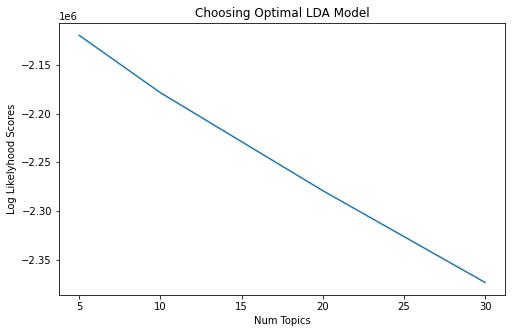

In [ ]:
# Get Log Likelyhoods from Grid Search Output
# Log Likelyhood: Higher the better
n_topics = [5, 10, 20, 30]
# log_likelyhoods = [gscore for gscore in model.cv_results_['mean_test_score']]
log_likelyhoods = [gscore for gscore in lda_gs.cv_results_['mean_test_score']]

# Show graph
plt.figure(figsize=(8, 5))
plt.plot(n_topics, log_likelyhoods)
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.show()

We also plotted the Log likelihood Score across the 4 numbers. As number of topics/clusters increase, the score gets lower meaning clustering gets worse.

In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.sklearn

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
# Make sure pyLDAvis is 2.1.2
# pyLDAvis.__version__

'2.1.2'

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tfidf_matrix, 
                                 tfidf_vectorizer, mds='tsne')
pyLDAvis.display(panel)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning:

`np.float` is 

Based on the intertopic distance map made by pyLDAvis, we can see no overlaps between the 5 topics in the top two principal components axes. By exploring different relevance metrics in this map, cluster 1 is more about **mental health and online learning**; cluster 2 is about **genetics and cellular biology related to covid**; cluster 3 is about **lung diseases, pneumonia and stroke**; cluster 4 is about **covid transmission, climate, temperature and humidity factors across world**; and cluster 5 is about **PCR, assay tests and clinical trials**. With less number of clusters, LDA shows **its power of generalize information and extract the larger meaningful topics from a large dataset.**

In [ ]:
# # visualize the plot without running the pyLDAvis

# # mount from google drive path
# from IPython.display import HTML
# HTML(filename=ldavs_path)

# direct import
from IPython.display import HTML
HTML(filename='hu_1002224728_lda_vis.html')

In [ ]:
# from google.colab import files
# pyLDAvis.save_html(panel, 'lda_vis.html')
# files.download('lda_vis.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Determining Keywords to reveal Risk Factors

With all the explorations from Kmeans and LDA, we have all the potential risk factors listed below.

In [ ]:
# Reference: https://www.kaggle.com/ajrwhite/covid-19-thematic-tagging-with-regular-expressions/data
age_synonyms = ['birth', 'neonatal', 'elderly', 'child', 'teenager', 'young',
                'adult', 'old']

sex_synonyms = ['sex', 'gender', 'male', 'female', 'man', 'woman', 'pregnant',
                'pregnancy', 'maternal', 'pregnant woman']

bodyweight_synonyms = ['overweight', 'over weight', 'obese', 'obesity',
                       'bodyweight', 'body weight', 'bmi', 'body mass',
                       'body fat', 'bodyfat', 'kilogram', 'kg']

smoking_synonyms = ['smoking', 'smoke', 'cigar', 'cigarette', 'nicotine', 
                    'cannabis', 'marijuana']

diabetes_synonyms = ['diabet', 'insulin', 'blood sugar', 'blood glucose',
                     'ketoacidosis', 'hyperglycemi']

hypertension_synonyms = ['hypertension', 'blood pressure', 'hbp', 'htn',
                         'stroke']

immunodeficiency_synonyms = ['immune deficiency', 'immunodeficiency', 'hiv',
                             'aids', 'hypogammaglobulinemia', 'asplenia',
                             'complement deficiency', 'neutropenia',
                             'neutropaenia','cell deficiency']

cancer_synonyms = ['cancer', 'malignant tumour', 'malignant tumor', 'melanoma',
                   'leukemia', 'leukaemia', 'chemotherapy', 'radiotherapy',
                   'radiation therapy', 'lymphoma', 'sarcoma', 'carcinoma',
                   'blastoma', 'oncolog', 'breast cancer', 'lung cancer']

chronicresp_synonyms = ['chronic respiratory disease', 'asthma',
                        'chronic obstructive pulmonary disease',
                        'chronic bronchitis', 'emphysema']

climate_synonyms = ['climate', 'weather', 'humid', 'sunlight', 'air temperature',
                    'meteorolog', 'climatolog', 'dry', 'damp', 'moist', 'wet',
                    'hot environment', 'cold environment', 'cool environment']

pollution_synonyms = ['pollution', 'air pollution', 'air quality', 'emission',
                      'pollutant','pm','ozone','wastewater']

socioecon_synonyms = ['poverty', 'crowding', 'economic', 'social', 'low income', 
                      'low middle income', 'middle income','security']

mental_synonyms = ['mental health', 'mental', 'psychological', 'depression', 
                   'stress', 'anxiety','distress','depressive','loneliness',
                   'ptsd', 'burnout']

In [ ]:
potential_rf = [age_synonyms, sex_synonyms, bodyweight_synonyms, smoking_synonyms,
                diabetes_synonyms, hypertension_synonyms, immunodeficiency_synonyms, 
                cancer_synonyms, chronicresp_synonyms, climate_synonyms,
                pollution_synonyms, socioecon_synonyms, mental_synonyms]

# flatten list
potential_rf = [rf for sublist in potential_rf for rf in sublist]

# make into a dataframe with their counts
# count_and_tag function is from exploratory anlysis section
df_c, potential_rf_counts = count_and_tag(df_c, potential_rf, 'risk_generic')
rf = pd.DataFrame({'risk_factor':potential_rf_counts.index, 'counts':potential_rf_counts.values})
rf = rf[(rf[['counts']] != 0).all(axis=1)]
rf

,risk_factor,counts
0,birth,1240
1,neonatal,1023
2,elderly,3161
3,child,8446
4,teenager,81
...,...,...
115,distress,7442
116,depressive,1084
117,loneliness,791
118,ptsd,453


Text(0.5, 1.0, 'Risk Factors Frequency in Abstracts')

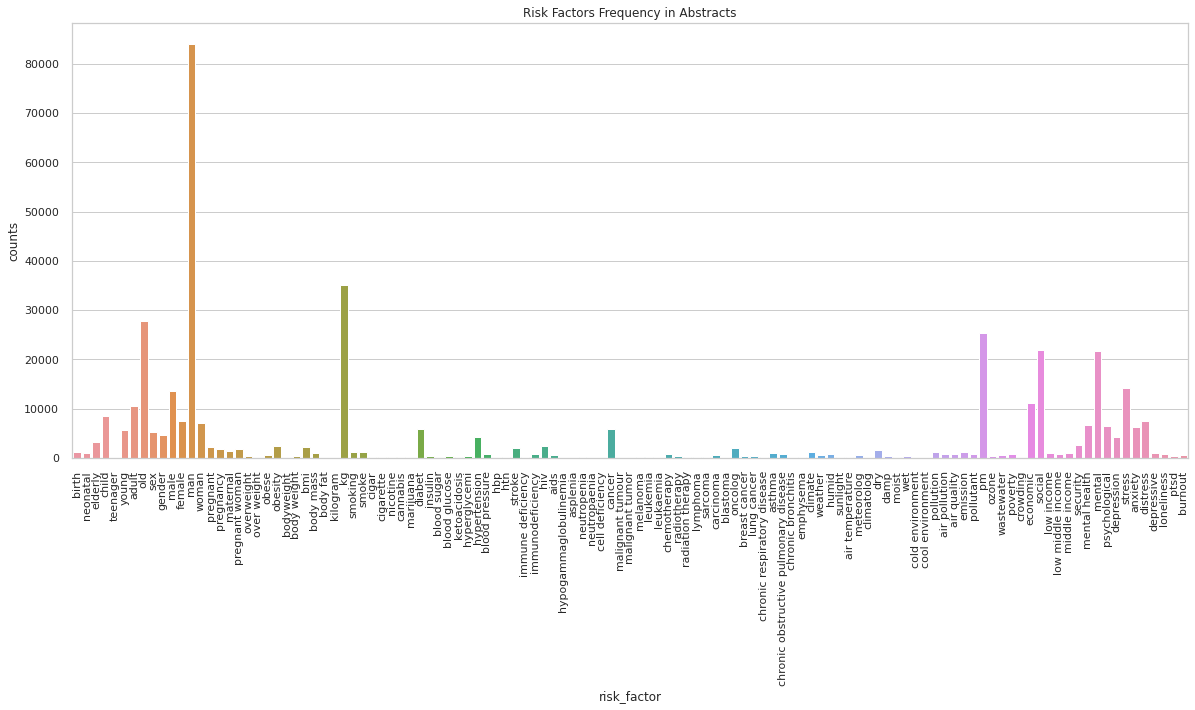

In [ ]:
plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="risk_factor", y="counts", data=rf)
plt.xticks(rotation=90)
plt.title('Risk Factors Frequency in Abstracts')

We make all the potential risk factors into one list, then count the frequency of each word, remove words which does not appear in this data. We make a dataframe with all 117 risk factors.

## Hierarchical Clustering on Keywords

Our approach here is to examine the relationship between the risk factors based on their co-occurrences in each abstract.

In [ ]:
# make all the risk factors into a list
keywords = rf['risk_factor'].tolist()

# Use pipeline to apply CountVectorizer on the keywords first
# then use TF-IDF transformer to find the frequency of each risk factor in the abstracts
pipe = Pipeline([('count', CountVectorizer(vocabulary=keywords)),
                 ('tfid', TfidfTransformer())]).fit(df_c.abstract)
rf_matrix = pipe.transform(df_c.abstract)

In [ ]:
# Calculate the distance from cosine similarity between risk factors on the transpose matrix
dist = 1 - cosine_similarity(rf_matrix.T, rf_matrix.T)

#### Complete Linkage

In [ ]:
# Apply Complete Linkage
linkage_matrix = complete(dist)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

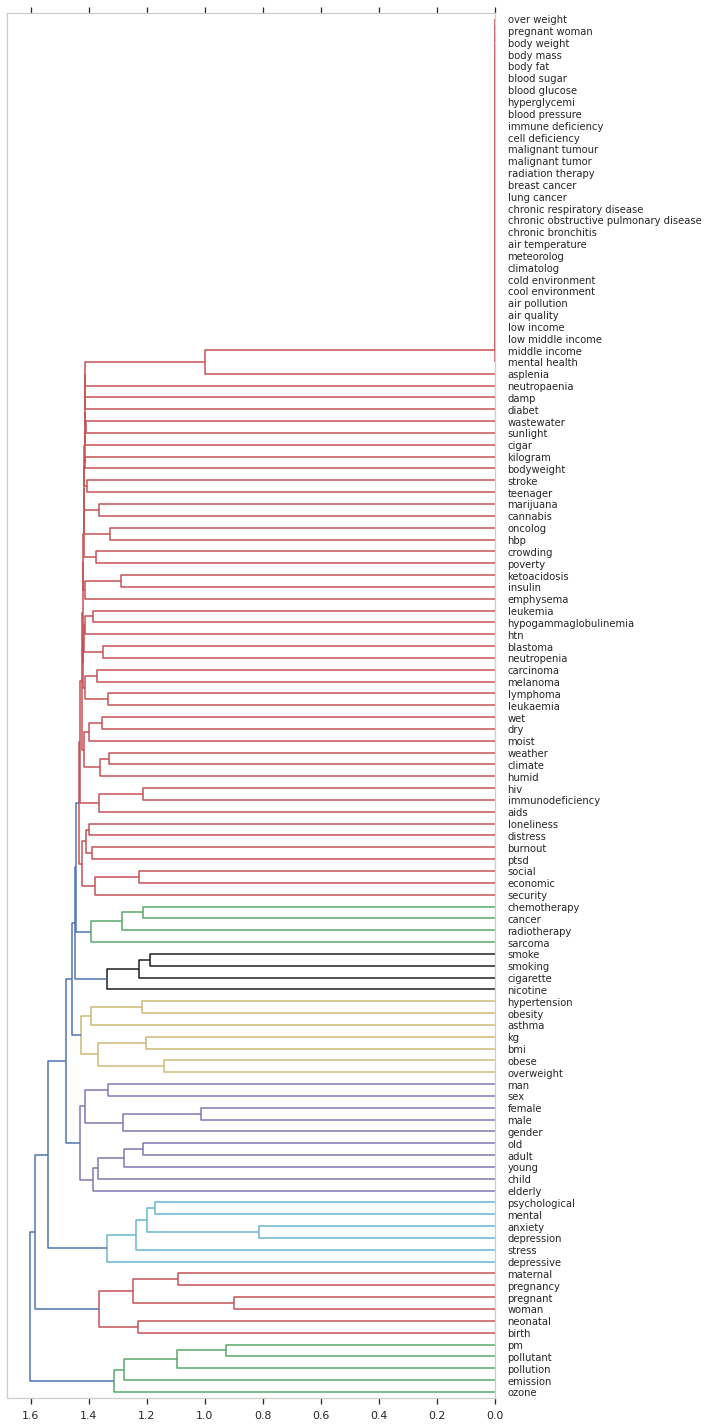

In [ ]:
# max distance between points to be considered together
# select as 0.9 after tuning
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.9 

fig, ax = plt.subplots(figsize=(10, 20)) # set size
ax.grid(False)
ax = dendrogram(linkage_matrix, orientation="left", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=10,
                labels=keywords)

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout

We can see that all the pollution terms are clustered together, as well as pregnancy, mental health issues, age, gender, obesity, smoking and cancer.

Hypertension is identified closer to obesity rather than blood pressure, because obesity can cause hypertension. All the branches with risk factors are grouped in quite reasonable way. In the top large red groups, the bottom branches are categorized quite reasonably; however, hierarchical clustering suffers to group these factors into larger and general group/topics.

#### Ward Linkage

In [ ]:
# Apply Ward Linkage
linkage_matrix = ward(dist)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

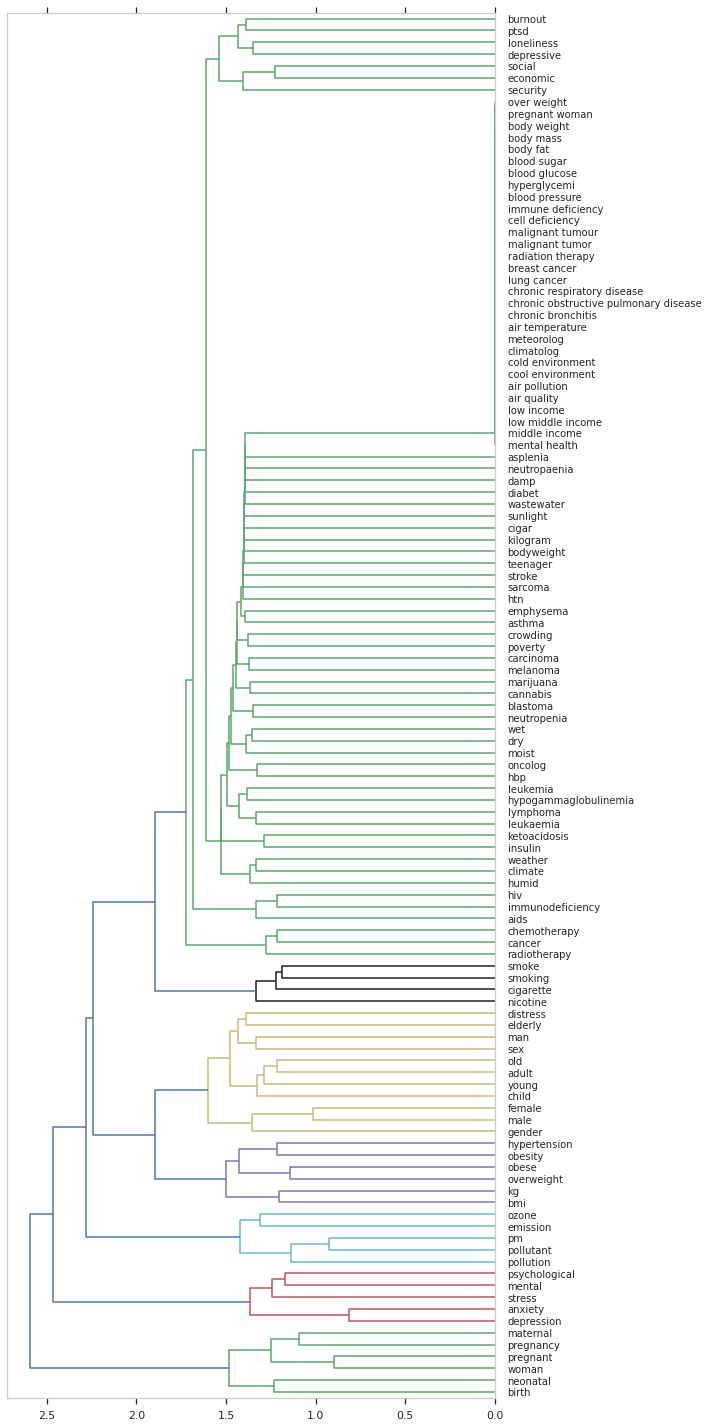

In [ ]:
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.7 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(10, 20)) # set size
ax.grid(False)
ax = dendrogram(linkage_matrix, orientation="left", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=10,
                labels=keywords)

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout

Ward linkage makes more balanced branches. The group is quite similar to complete linkage, except PTSD, burnout and loneliness are categorized more further with other green branches. Ward linkage is better, since psychological issues should be less related with rest of clinical and physical factors in the large green group at the top.

#### Single Linkage

In [ ]:
# Apply Single Linkage
linkage_matrix = single(dist)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

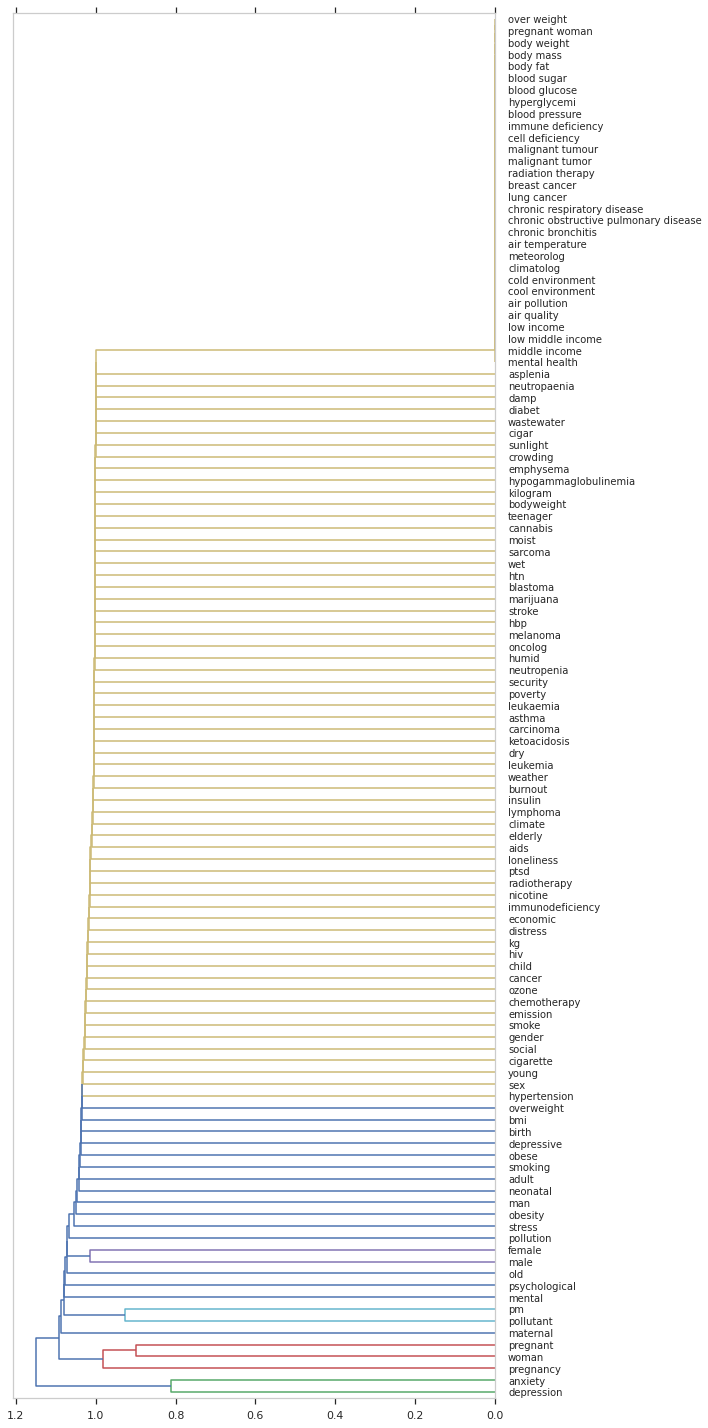

In [ ]:
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.9 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(10, 20)) # set size
ax.grid(False)
ax = dendrogram(linkage_matrix, orientation="left", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=10,
                labels=keywords)

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout

Single linkage is the least favorable one, it does not reveal the separateness of the clusters. This is due to the mechanism of single linkage, which is based on bottom-up grouping (agglomerative clustering). This makes the groups and hierarchy less meaningful.

## Insights on How Deadly the Risk Factors Are

In [ ]:
# Elimiate the risk factors with frequency less than 200
rf = rf[(rf[['counts']] > 200).all(axis=1)]
rf

,risk_factor,counts
0,birth,1240
1,neonatal,1023
2,elderly,3161
3,child,8446
5,young,5579
...,...,...
115,distress,7442
116,depressive,1084
117,loneliness,791
118,ptsd,453


In [ ]:
# Append the severity list to examine which risk factor correlates more with 
# keywords like death, deadly, die...
severity = ['death', 'deadly', 'die', 'dead', 'morbidity', 'prevalence', 
            'recover', 'recovery']
lst = rf['risk_factor'].tolist()
lst.extend(severity)

In [ ]:
# Similar transformation is made
keywords = lst
pipe = Pipeline([('count', CountVectorizer(vocabulary=keywords)),
                 ('tfid', TfidfTransformer())]).fit(df_c.abstract)
rfd_matrix = pipe.transform(df_c.abstract)

In [ ]:
# get cosine similarity between all risk factors and severity words
cs = cosine_similarity(rfd_matrix.T, rfd_matrix.T)

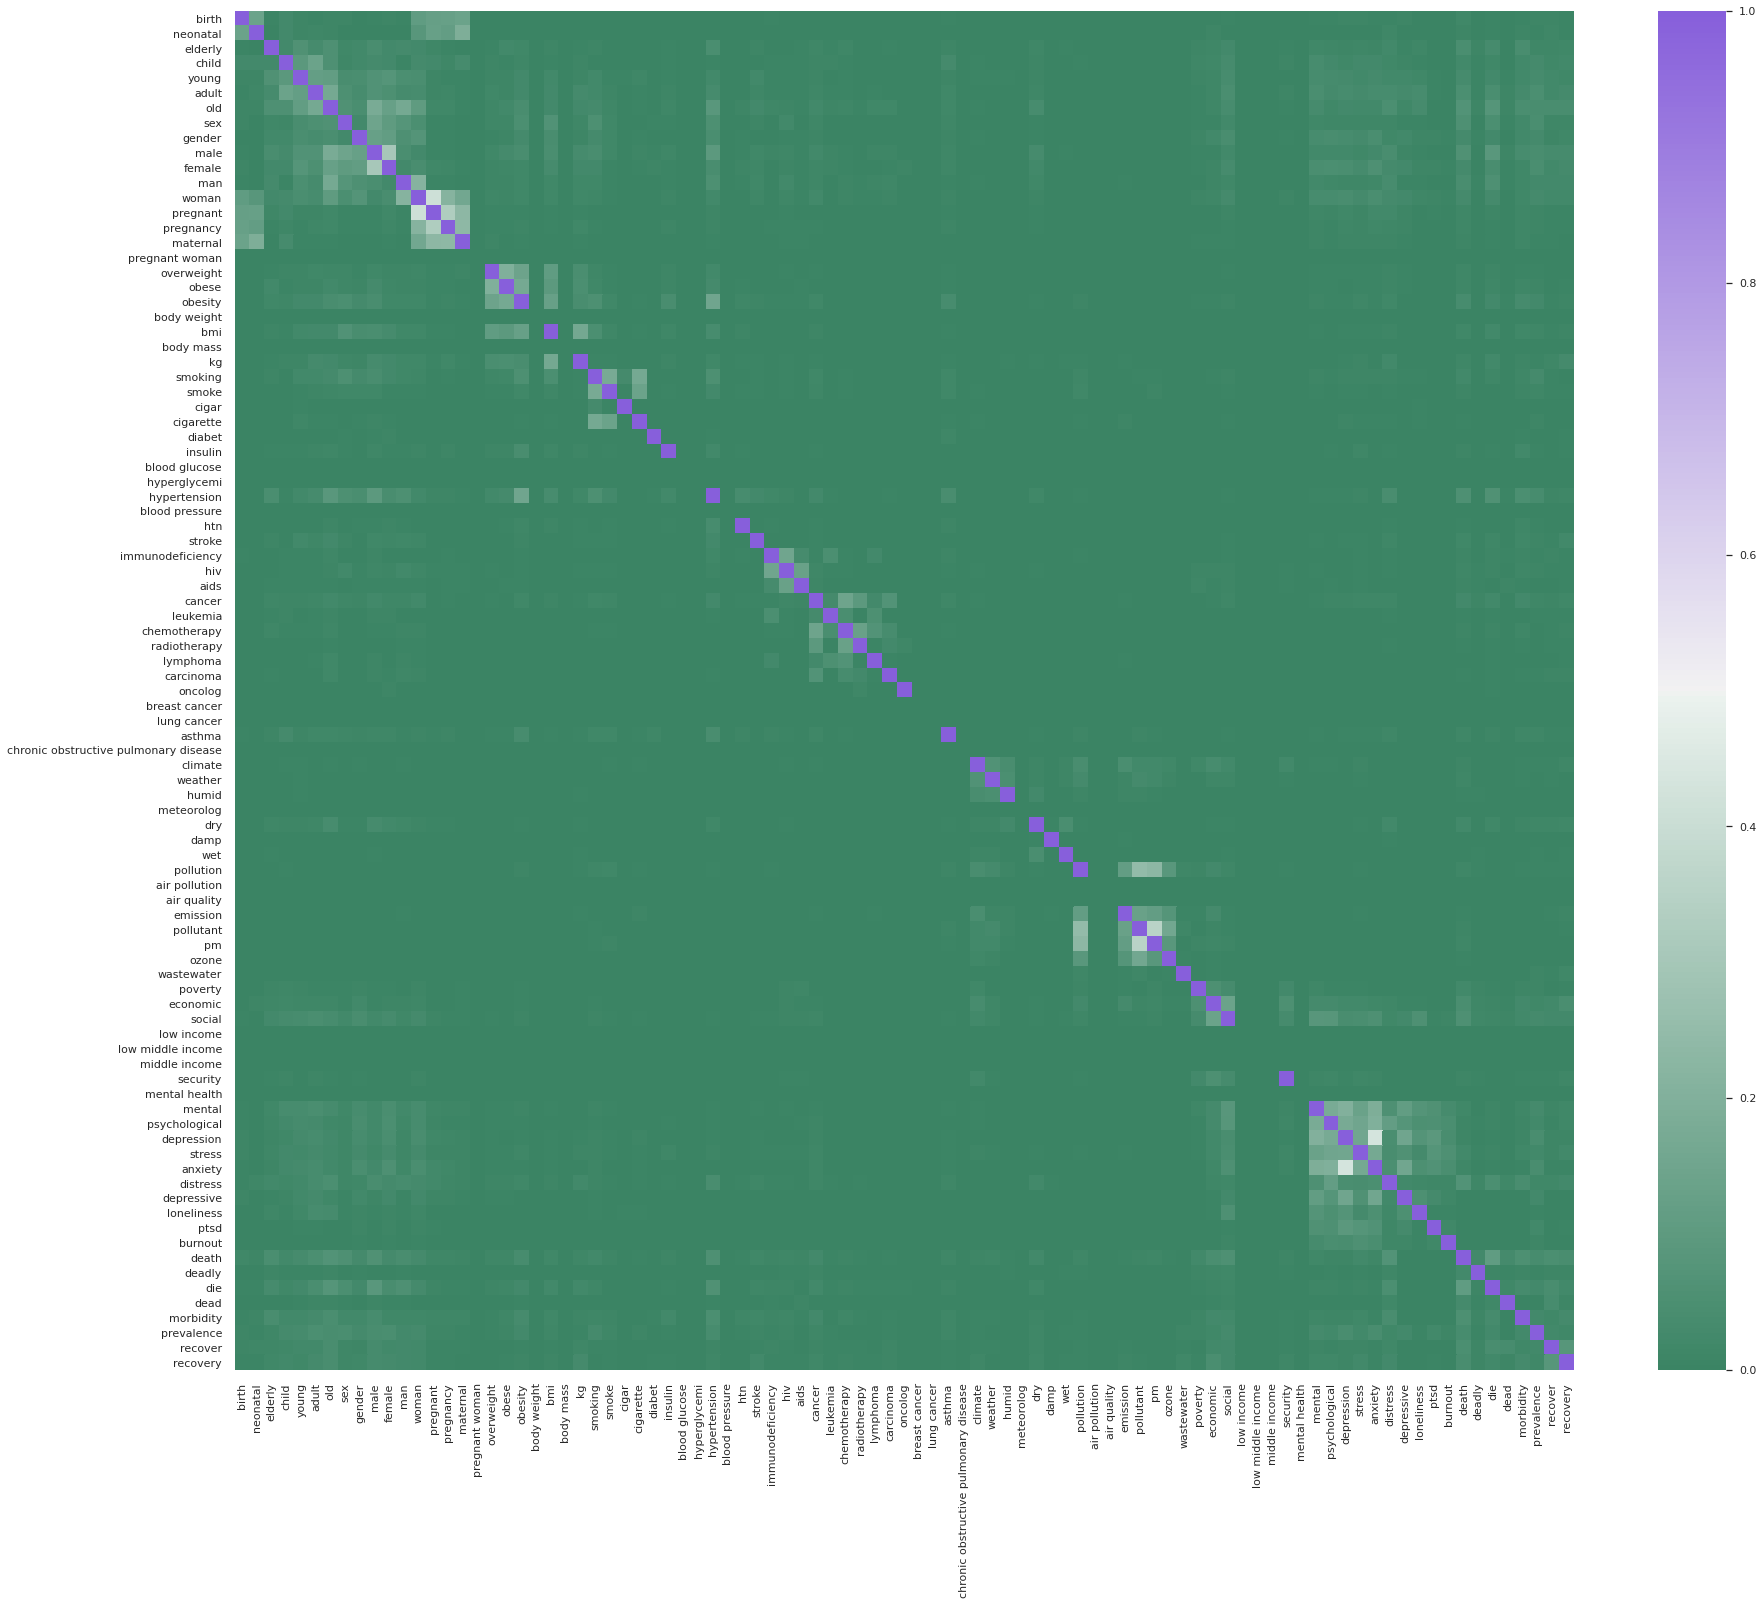

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Make a heatmap based on cosine simlarities
plt.figure(figsize=(30, 25))
x_axis_labels = keywords
y_axis_labels = keywords

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(cs, xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            cmap=cmap) #  cmap='YlOrRd'
plt.show()

##### **Overview**
Let's focus on the last 8 rows first to check which risk factor correlates more with this severity words mentioned in the abstract. We can see "**elderly**", "**old**", "**male**", "**obesity**", "**bmi**", "**hypertension**", "**cancer**", "**asthma**", "**dry**", "**poverty**", "**economic**", "**social**", "**distress**" are more related to word "**death**", "**deadly**" and "**morbidity**". Compared to those mostly related factors, "**smoking**", "**stroke**", "**hiv**", "**chemotherapy**", and "**pollution**" also shows similarity with term "death".

Overall, the risk factors based on our model also aligned with the government of Canada are older age, obesity, hypertension, asthma, cancer, stroke, smoking. Older people are categorized as the most vulnerable population to get Covid. Currently, older people from current long-term care homes are monitored at a high-security level.

<br>

##### **Risk Factors: Obesity & Hypertension**
Researchers also mention that Covid is more deadly in people with obesity. Since this kind of people with more fat in the abdomen pushing up on the diaphragm, the reduced lung volume causes more breathing difficulty (Wadman, 2020). Based on our model, hypertension is highly related to obesity, which is also true that obesity causes hypertension.

<br>

##### **Risk Factor: Dry Air**
The word "dry" also shows an apparent relation with "death", "die" and "morbidity". From exploring the abstracts, dry usually combined with cough, as a symptom of covid. Another combination is "**dry air**". According to an abstract in the data, the study shows influenza virus survive longer within cold and dry air, thereby increasing the likelihood of subsequent transmission. There is a higher chance of developing influenza and MERS infections when the relative humidity declines from about 40-60% (typically in warmer weather) to about 20% (Glatter, 2020). Dry air is recognized as a risk factor of covid.

<br>

##### **Risk Factors: Mental Health Problems**
Interestingly, "**distress**" has high correlation with "death" and "morbidity". Mental stress may lead to malfunction in the immune system, making people with distress more easily infected. Another way to interpret our result is people who already had covid experienced severe distress. These patients felt more pain both physically and mentally, which ultimately led to death.

We can see that all the psychological terms like "**mental**", "**depression**", "**stress**", "**anxiety**", "**depressive**" and "**ptsd**" highly correlate with word "**prevalence**". One way to interpret this would be that people who experience all kinds of mental health problems would have a higher chance of being infected. A high cortisol level indicates higher stress. Researchers found that dexamethasone, a drug reducing cortisol and inflammation, help covid patients (Parshley, 2020). Thus, stress is a risk factor of covid.

Although psychological issues are paid with less attention, mental issues would also significantly impact spreading covid, like stress leading to high chance of infection, loneliness, and anxiety, causing more in-person social communication. Furthermore, "ptsd" in the heatmap conveys that people who had covid experienced PTSD after recovery. It is also important to offer mental health therapy to help people get out of the painful experience.

<br>

##### **Increasing Cases in Younger Adults**
With the recent outbreak in Ontario, more younger people are also infected. Other than older age, younger people with obesity and hypertension should also be careful since obesity and hypertension are also deadly risk factors among the younger generation. More younger people are infected because they tend to go out and join parties more frequently. Staying at home make people feel more lonely (loneliness is also a potential risk factor from our LDA), and have other mental health issues. We can see **the word "young" is also closely related to other psychological terms from covid related abstracts**. Many young people think that the covid death rate of their generation group is not high. They go outside without any fears. To reduce the Covid cases,  the government make** more advertising on social media to emphasize the importance of social distancing, alert people that younger patients also have severe symptoms, and the rate of going into ICUs is increasing**.

<br>

##### **Interrelated Risk Factors: Socioeconomics & Mental Health Issues**
We can also see that mental health terms also correlated with socioeconomics terms such as "**poverty**", "**security**", "**social**", and "**economic**". Since all the abstracts are covid related, the relationship between mental health and socioeconomics is also based on covid. With the outbreak of covid, the economy went down. Many people lost their jobs leading to social instability, which leads to more serious psychological problems such as anxiety, stress, and depression in every family. We can see that socioeconomic problems, mental health issues, and covid are interrelated. **It is crucial for the government to offer more social welfare and reduce personal spending on healthcare.**
*   Covid makes the economy down 
*   Lower-income leads to more anxiety and stress
*   Stress may lead to vulnerability to get Covid infection
*   Covid patients with lower income have poor health insurance plans causing a high death rate

<br>

##### **Evaluation on Models**
In conclusion, we have applied K-means clustering and LDA Topic Modeling to find potential risk factors, then apply hierarchical clustering to all risk factors to find relationships between these risk factors based on their cosine similarity. Then we explore how deadly these risk factors are.
All those models have their advantage and disadvantage.
* K-means Clustering: In general, **K-means is better for exploration**. **PCA combined with TF-IDF produces better results** than applying K-means directly on TF-IDF because PCA captures the largest variances between words.
* LDA Topic Modeling: LDA is better than K-means since they can make the clusters where the single document can belong to several different topics. **LDA tends to produce fewer clusters, meaning they are more robust to extract the common topics** from the large dataset.
* Hierarchical Clustering: **Ward and complete linkage are better** than single linkage. Compared to K-means clustering, **hierarchical clustering offers more detail in relationships between items in and between the clusters**.

References

Glatter, R. (2020, October 25). *Dry Air Indoors Will Increase Transmission Of Covid-19 As Winter Approaches*. Forbes. https://www.forbes.com/sites/robertglatter/2020/10/25/dry-air-indoors-will-increase-transmission-of-covid-19-as-winter-approaches/?sh=1bffb6fc720e. 

Parshley, L. (2020, September 3). *Why researchers are worried about chronic stress and Covid-19*. Vox. https://www.vox.com/2020/9/3/21419902/covid-19-risk-factors-chronic-stress-racism-immune-system. 

Wadman, M. (2020, September 8). *Why COVID-19 is more deadly in people with obesity-even if they're young*. Science. https://www.sciencemag.org/news/2020/09/why-covid-19-more-deadly-people-obesity-even-if-theyre-young. 
